In [11]:
rm(list = ls())
library(tidyverse)
library(readxl)
library(dplyr)
library(ggplot2)
setwd("C:/Users/rohan/Jupyter Projects/MSEF/Clustering Workspace/")
#dat <- read.table("distanceMatrix3.txt", header = T, sep = ",",row.names = 1)
dist <- read.table("Out_distanceMatrix.txt", header = T, sep = ",",row.names = 1)
wordct <- read.table("Out_wordCountMatrix.txt", header = T, sep = ",",row.names = 1)
matchct <- read.table("Out_matchCountMatrix.txt", header = T, sep = ",",row.names = 1)

msef <- read_excel("MSEF_data2_20210907.xlsx", sheet = "ParticipantLevel", na = "NA")
# msef <- as.data.frame(msef[,c(1,3)])
msef <- as.data.frame(msef)

In [12]:
head(msef)

sno,Year,Title,clean Title + Ontology Terms,uniq_project_title,ProjectID3,uniqProjectID,multischool_project,ProjectApproach,OnotologyTerms,...,American_Indian%,Pacific_Islander%,Two_or_more_races%,WhitePercInMSEF,BlackPercInMSEF,HispanicPercInMSEF,AsianPercInMSEF,SchoolDiversity,MSEFDiversity,DeviationEthnicityRep
23,2014,"A New Method for Identifying Active Regulatory DNA Elements, Phase II","a new method for identifying active regulatory dna elements, phase ii genetic,method genetics funda biology",1,1,1,NA,m,"genetic,method",...,NA,NA,NA,0.6907216,0.000000000,0.00000000,0.1340206,NA,-0.2279738,NA
1134,2017,"Actively Growing Hydroponics with Salt Water, Electricity-Free","actively growing hydroponics with sodium chloride water, electricity free chemical,chemical,method,agriculture,water biology agriculture environment",1,2,1,NA,m,"chemical,chemical,method,agriculture,water",...,0.001,0.000,0.053,0.2339181,0.005847953,0.00000000,0.5906433,-0.4878019,-0.2957110,0.1133163
2256,2020,"Air Pressure, Friction, and the Motion of Objects","air pressure, friction, and the motion of objects aerodynamics physics funda Engineering",1,3,1,NA,a,aerodynamics,...,0.003,0.002,0.053,0.4000000,0.133333333,0.03333333,0.3000000,-0.5559626,-0.4819518,0.1575366
2792,2018,"Al, NaF, and C4H6O2 Impacts on Learning and Memory in D. melanogaster","al, naf, and c4h6o2 impacts on learning and memory in d.melanogaster behaviour,chemical,chemical,alcohol,chemical,metal, inorganic,neuroscience, behaviour,organism,insect, fruitfly, drosophila chemistry behaviour biology",1,4,1,NA,a,"behaviour,chemical,chemical,alcohol,chemical,metal, inorganic,neuroscience, behaviour,organism,insect, fruitfly, drosophila",...,NA,NA,NA,0.0000000,0.000000000,0.00000000,0.0000000,NA,NA,NA
2793,2015,"Aluminum, Gasoline, and Your Brain","aluminum, gasoline, and your brain chemical,metal, inorganic,energy,organ,neuroscience, toxin chemistry medical BehavioralAndSocial",1,5,1,NA,a,"chemical,metal, inorganic,energy,organ,neuroscience, toxin",...,NA,NA,NA,0.0000000,0.000000000,0.00000000,0.0000000,NA,NA,NA
2704,2021,"Automated Detection of Stereotypic Behaviors, Their Characterization and Their Relation to Sensory Input and Cardiovascular Activity Using Wearable Sensors and ML/DL Techniques","automated detection of stereotypic behaviors, their characterization and their relation to sensory input and cardiovascular activity using wearable sensors and ml dl techniques device,organ, human compsci medical ComputerSci",1,6,1,NA,m,"device,organ, human",...,0.002,0.001,0.032,0.0952381,0.000000000,0.00000000,0.4761905,-0.4859208,-0.2506939,0.3015949


In [13]:
dim(dist)
dim(wordct)
dim(matchct)

[1] 60 60

[1] 60 60

[1] 60 60

In [14]:
fillLowerTri <- function(m){
    r <- dim(m)[1]
    c <- dim(m)[2]
    out = matrix(0, nrow = r, ncol = c)
    rownames(out) <- rownames(m)
    colnames(out) <- colnames(m)
    
    for (i in c(1:r)){
        for (j in c(1:c)){
            out[j,i] <- m[i,j]            
        }
    }
    return(out)
}

In [15]:
m <- as.matrix(dist)
m <- fillLowerTri(m)
range(m)
diag(m) = 0

m2 <- as.matrix(wordct)
m2 <- fillLowerTri(m2)
m2 <- m2/2
range(m2)

m3 <- as.matrix(matchct)
m3 <- fillLowerTri(m3)
range(m3)

#unmatchedWordCount
m4 <- m2 - m3
range(m4)
m4 <- m4+abs(min(m4))
m4 <- m4*m4
# m4 <- m4/max(m4)
which(m4[lower.tri(m4)] == 0)
range(m4)


#invert the distance matrix
m <- m*m
# m[which(m == 0)] = -1
range(m)
# m <- 1/m
# m[which(m == -1)] = 0
range(m)


m5 <- m - m4*0.01
m5[which(m4 == 0)] = 0
range(m5)
m5 = max(m5)-m5
range(m5)
# m5 = abs(m5)



[1]  0 10

[1]  0 10

[1]  0 10

[1] -0.5  8.0

[1] 685

[1]  0.00 72.25

[1]  0 64

[1]  0 64

[1] -0.0025 63.9900

[1]  0.0000 63.9925

In [16]:
d <- as.dist(m5)
h <- hclust(d)
tre <- as.dendrogram(h)

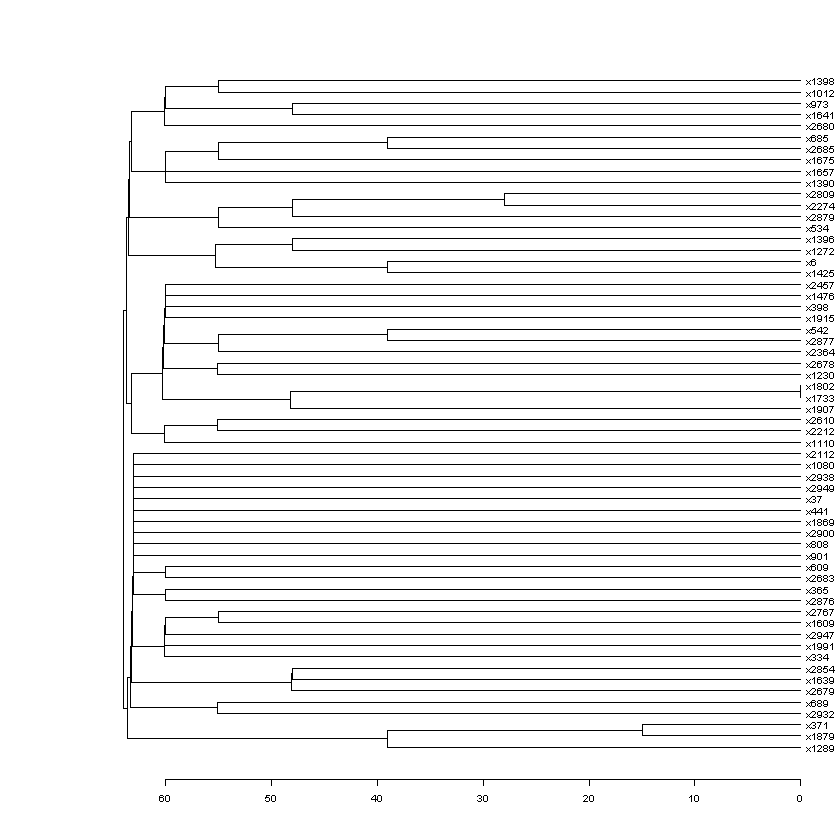

In [17]:
par(cex=0.5, mar=c(5, 8, 4, 1))
plot(tre, horiz = T)

In [18]:
labs <- rev(h$labels[h$order])
cat(labs, sep = "\n")
model <- paste("x", msef$sno, sep = "")
rownames(msef) <- model
msef <- cbind(msef, model)
clustord <- c(1:length(labs))
msef <- cbind(msef[labs,], clustord)
dim(msef)
colnames(msef)
# msef[labs,c(1,2)]
#msef <- cbind(msef, t)
cat(unlist(msef[labs,"Title"]), sep = "\n")

x1398
x1012
x973
x1641
x2680
x685
x2685
x1675
x1657
x1390
x2809
x2274
x2879
x534
x1396
x1272
x6
x1425
x2457
x1476
x398
x1915
x542
x2877
x2364
x2678
x1230
x1802
x1733
x1907
x2610
x2212
x1110
x2112
x1080
x2938
x2949
x37
x441
x1869
x2900
x808
x901
x609
x2683
x365
x2876
x2767
x1609
x2947
x1991
x334
x2854
x1639
x2679
x689
x2932
x371
x1879
x1289


[1] 60 71

[1] "sno"                              "Year"                            
 [3] "Title"                            "clean Title + Ontology Terms"    
 [5] "uniq_project_title"               "ProjectID3"                      
 [7] "uniqProjectID"                    "multischool_project"             
 [9] "ProjectApproach"                  "OnotologyTerms"                  
[11] "Field"                            "AppliedTo"                       
[13] "AppliedValue"                     "ProjectField"                    
[15] "Cancer"                           "AI_ML"                           
[17] "InfectiousDiseases_Covid"         "Water"                           
[19] "energy"                           "medical"                         
[21] "pollution"                        "Category"                        
[23] "SchoolName"                       "school_id"                       
[25] "school_region"                    "zip"                             
[27] "gender"                           "grade"                           
[29] "award"                            "awardvalue"                      
[31] "Ethnicity"                        "Race"                            
[33] "PerfBySchoolByYr"                 "RacePercBySchoolAllYears"        
[35] "TotalStudentParticipatedAllYears" "StudentsByYearBySchool"          
[37] "AllGender"                        "AllGrade"                        
[39] "AllEthnicity"                     "GenderComp"                      
[41] "AvgGrade"                         "EthnicityComp"                   
[43] "team_size"                        "award_value"                     
[45] "Total_awardValue"                 "TotalProjectFromSchoolAllYears"  
[47] "NumberOfYearsParticipated"        "2019Score"                       
[49] "2019SchoolRank"                   "2018Rank"                        
[51] "isCharter"                        "isTitle1"                        
[53] "NumStudents"                      "NumTeachers"                     
[55] "SpendingPerPupil"                 "White%"                          
[57] "Black%"                           "Hispanic%"                       
[59] "Asian%"                           "American_Indian%"                
[61] "Pacific_Islander%"                "Two_or_more_races%"              
[63] "WhitePercInMSEF"                  "BlackPercInMSEF"                 
[65] "HispanicPercInMSEF"               "AsianPercInMSEF"                 
[67] "SchoolDiversity"                  "MSEFDiversity"                   
[69] "DeviationEthnicityRep"            "model"                           
[71] "clustord"

The Effect of Heat on the Amount of Static Electricity Gathered
Relationship between Temperature and Conductivity
Liquids vs. Electrical Wires
The Effect of Different Liquids on the Faraday Effect
The Effectiveness of Manually Cooling a Hot Liquid
The Boston Molasses Disaster
Density Functional Theory Calculation of Electronic Structure of Fe-N-C, Fe-O-C, Fe-P-C, Fe-S-C Single-Atom Catalysts Systems
Water Drying
The Investigation of Pepper’s Ghost
The Change in Resistance of Metals with Temperature
Blood Spatter Analysis
Blood Spatter
All That Matters Is The Spatter
An Analysis of Blood Stain Patterns
The Effect of Electromagnetic Forces on Metal Rings
Electromagnets
Unveiling the Power of Supermassive Black Holes in Distant Galaxies
The Power of PSI
Turns out, The Earth is Round
Are We Becoming More Alone in Space?
The Causation of Glitches in Pulsars
A Theory for Ring Formation Around Asteroid Chariklo
Astronomical Spectroscopy
Making Astronomical Observations Using the Electromagnet

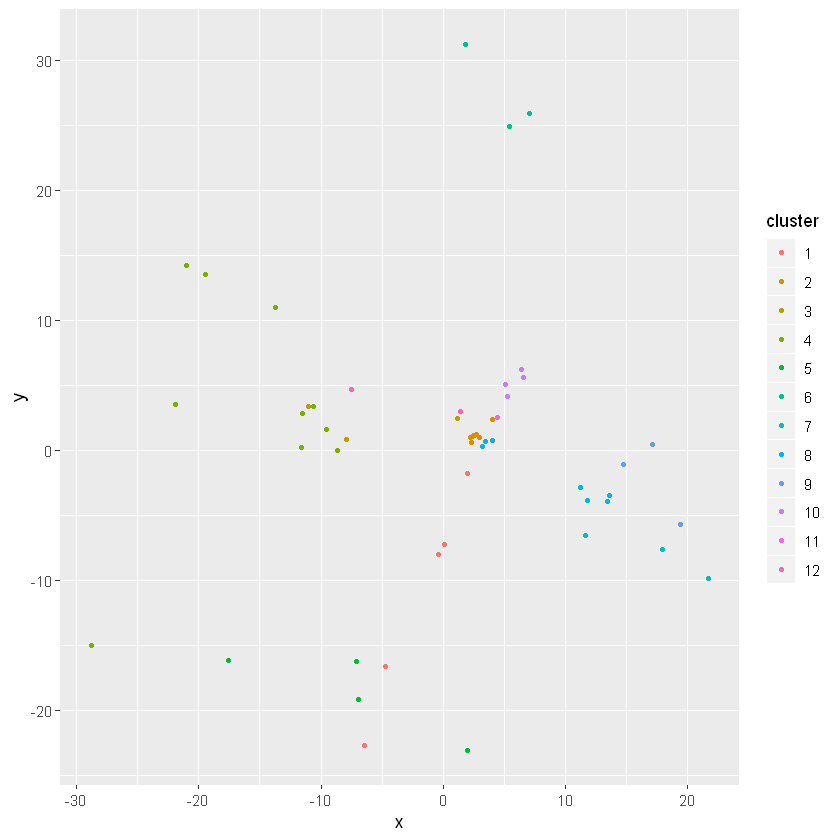

In [19]:
cluster <- cutree(h, k=12)
xy <- data.frame(cmdscale(d), factor(cluster))
names(xy) <- c("x", "y", "cluster")
xy$model <- rownames(xy)

ggplot(xy, aes(x, y)) + geom_point(aes(colour=cluster), size=1)

In [20]:
#xy
#reord <- merge(xy, msef, by = rownames)
msef <- merge(msef, xy, by = "model")
write.table(msef, file = "PhysicsProjects_msef_clusteringOrd.txt", sep = "\t", row.names=F)